## 진해여자고등학교 AI 창의 융합 독서 프로젝트 (코딩제작활동)
> 2025년 7월 18-19  
> 📄 강사: **백대성** (젤리코딩 원장) | ✉️ dsbaek898@icloud.com

# 🧬 유전자 분석과 시각화

## 🎯 목표

- DNA 염기서열 데이터를 분석하고 **시각적으로 표현하는 방법**을 배웁니다.  
- 코딩을 통해 생명과학의 핵심인 **염기, RNA, 단백질 번역 과정**을 직접 체험합니다.  
- 데이터 기반 생물학 탐구에 필요한 **사고력과 표현력**을 키우는 것이 목적입니다.

---

## 1️⃣ DNA 염기서열, 그게 뭐예요?

DNA는 `A`, `T`, `C`, `G` 4가지 염기로 구성된 **정보의 코드**입니다.  
사람의 몸, 식물의 뿌리, 바이러스의 증식 방식까지 모두 이 코드를 바탕으로 결정됩니다.

이번 실습에서는 아래와 같은 작업을 합니다:

- `ATCGATCG...` 처럼 생긴 염기서열을 시각화 (색으로 표현)  
- 각 염기의 빈도(등장 횟수)를 그래프로 분석  
- 코돈(3개씩 짝지은 염기) → 아미노산으로 번역하는 과정 확인

---

## 2️⃣ 무엇을 시각화하나요?

- **염기 막대 시각화**: A는 초록, T는 빨강... 염기서열이 시각적으로 보입니다.  
- **빈도 히스토그램**: 어떤 염기가 얼마나 나왔는지 직관적으로 확인  
- **RNA로 전사, 단백질로 번역**: DNA 정보가 실제 생명 활동으로 바뀌는 과정을 살펴봅니다.  
- **코돈-아미노산 매핑**: `ATG → M`, `GCC → A` 같이 변환 과정을 눈으로 확인

---

## 3️⃣ 이걸 어디에 쓸 수 있나요?

- **생물학적 유사성 비교**: 특정 염기 조합이 있으면 특정 병에 취약할 수도 있습니다.  
- **유전 기반 질병 예측**: 암, 유전병, 알러지 등과 관련된 유전자 패턴을 예측  
- **개인 맞춤 의학**: 약을 맞춤 추천하려면 유전자 해석이 필수입니다.

---

## 🧪 파이썬 없이 표현하는 알고리즘 예시

### ✅ 예시 1: 로지스틱 회귀로 유전자 변이 예측

```python
# 유전자에 특정 염기 조합이 있는지(1) 없는지(0) → 이진 분류
# 입력: [A,T,C,G] 출현 수 → 출력: 병 위험도 (0~1)

score = 0.2*A_count + 0.5*G_count - 0.3*T_count
probability = 1 / (1 + exp(-score))  # 시그모이드 함수
```

➡️ 유전자 정보로 특정 질병에 걸릴 확률을 예측

---

### ✅ 예시 2: KNN으로 유사 유전자 분류

```python
# 새로운 유전자 시퀀스가 기존의 어떤 그룹(예: 질병 보유/비보유)에 가까운지 비교

if distance_to_group_A < distance_to_group_B:
    label = "Group A"
else:
    label = "Group B"
```

➡️ 데이터 기반으로 **가장 가까운 이웃**을 기준으로 분류

---

### ✅ 예시 3: 염기서열의 경사하강법 적용 (고급)

```python
# 목표: 특정 염기 비율에서 예측 정확도가 높아지도록 가중치 조정

w_A = w_A - alpha * dL/dw_A  # A 염기의 영향력 업데이트
```

➡️ 오차를 줄이기 위한 최적화 (머신러닝 모델 훈련 방식)

---

## 📌 핵심 정리

| 주제               | 적용 |
|--------------------|------|
| 염기 빈도 시각화   | 생물학적 특성 이해 |
| RNA 전사, 단백질 번역 | 생명 정보 흐름 이해 |
| 머신러닝 개념 응용 | 질병 예측, 유전자 분류 |

---


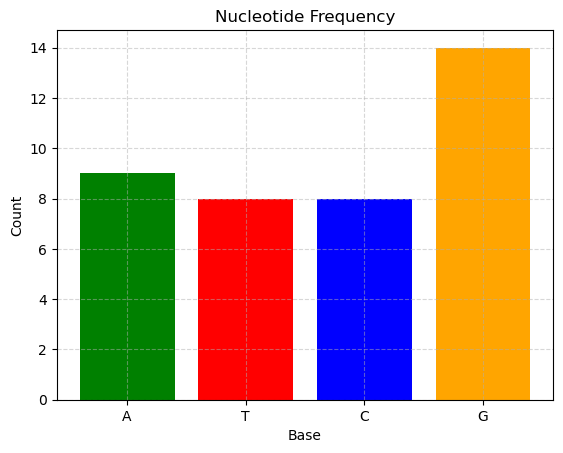

In [2]:
# 염기서열 데이터
sequence = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"

# 염기 빈도 분석 및 시각화
from collections import Counter
import matplotlib.pyplot as plt

count = Counter(sequence)
bases = ['A', 'T', 'C', 'G']
values = [count.get(b, 0) for b in bases]

plt.bar(bases, values, color=['green', 'red', 'blue', 'orange'])
plt.title("Nucleotide Frequency")
plt.xlabel("Base")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


🧬 유전자 염기서열을 이용한 질병 예측 – 로지스틱 회귀, 선형 회귀, 경사하강법의 관계 정리

────────────────────────────────────────────

선형 회귀 (Linear Regression)
예측값을 직선으로 표현하는 모델
입력값 x에 대해 숫자 y를 예측함
계산 방식: y_hat = w * x + b
(여기서 w는 가중치, b는 절편)
예: 공부 시간(x) → 시험 점수(y)를 예측
결과는 제한 없이 아무 숫자(예: 52.1, 99.8)로 나옴
────────────────────────────────────────────

로지스틱 회귀 (Logistic Regression)
선형 회귀의 결과를 확률로 바꿔 이진 분류(예/아니오)를 가능하게 함
먼저 선형 결합 z를 계산: z = w * x + b
그다음 시그모이드 함수로 확률 계산:
y_hat = 1 / (1 + exp(-z))
결과는 항상 0과 1 사이의 값 (확률처럼 해석 가능)
y_hat ≥ 0.5이면 "예", 아니면 "아니오"로 분류
즉, 로지스틱 회귀는 선형 회귀의 출력을 확률로 바꿔주는 모델

────────────────────────────────────────────

시그모이드 함수 (Sigmoid Function)
입력 z가 커질수록 출력은 1에 가까워지고
z가 작아질수록 출력은 0에 가까워짐
수식: sigmoid(z) = 1 / (1 + exp(-z))
이 함수 덕분에 예측 결과를 "확률"로 해석할 수 있음
────────────────────────────────────────────

경사하강법 (Gradient Descent)
로지스틱 회귀나 선형 회귀에서
가장 알맞은 가중치(w)와 절편(b)를 찾아내는 방법
손실(loss)이 작아지는 방향으로 w와 b를 조금씩 바꾸며 반복
학습 절차:

현재 w, b로 예측값 계산
실제 정답과 비교해서 오차(loss) 계산
오차가 줄어드는 방향으로 w와 b를 조정
이 과정을 반복하면서 최적의 값을 찾음
결국 컴퓨터가 스스로 가장 잘 맞는 w와 b를 찾게 되는 원리

────────────────────────────────────────────

전체 흐름 요약 (선형 → 로지스틱 → 경사하강법)
선형 회귀: 숫자를 예측
로지스틱 회귀: 숫자를 확률로 바꾸고, 분류를 수행
경사하강법: 이 과정을 가능하게 해주는 학습 알고리즘
예측 과정 정리:

입력값(x) → 선형 계산(z = w*x + b)
→ 시그모이드 적용(y_hat = 1 / (1 + exp(-z)))
→ 확률 해석 (예: y_hat = 0.82)
→ 기준 0.5를 넘으면 "질병 있음", 아니면 "정상"

→ 이 모든 계산에서 w와 b는 경사하강법으로 학습함

────────────────────────────────────────────

유전자 예측 실습과 연결
입력: 유전자 염기 A, T, C, G의 등장 횟수
w: 각 염기에 대한 중요도 (질병에 미치는 영향)
b: 기본 기준값 (절편)
예측 점수(score) = 각 염기 개수 * 가중치 + b
그 점수를 시그모이드 함수에 넣으면 확률이 됨
확률 ≥ 0.5 → 질병 유전자일 가능성 높음
확률 < 0.5 → 정상 유전자일 가능성 높음
────────────────────────────────────────────

확인 질문 (학생용)
선형 회귀와 로지스틱 회귀의 가장 큰 차이점은?
시그모이드 함수는 어떤 역할을 하나요?
경사하강법이 없다면 모델은 어떻게 작동할까요?
가중치가 양수면 어떤 의미? 음수면?
bias 값이 클수록, 작을수록 예측 결과는 어떻게 바뀔까요?
예측 확률이 0.82이면 어떤 결론을 내릴 수 있나요?
────────────────────────────────────────────

### ✅ 예시 1: 로지스틱 회귀로 유전자 변이 예측

이 활동에서는 간단한 **로지스틱 회귀 모델**을 사용하여 유전자 염기서열이 **질병과 관련 있는지 없는지**를 예측해봅니다.  
우리는 **A, T, C, G 염기의 등장 횟수**를 기준으로 질병의 위험도를 계산하고, **시그모이드 함수**를 통해 결과를 확률로 바꿉니다.

---

## 📌 1. 로지스틱 회귀란?

로지스틱 회귀는 아래처럼 생긴 수학 공식으로 분류 문제(예: 질병인지 아닌지)를 해결합니다.

\[
\hat{y} = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + \dots + w_nx_n + b)}}
\]

- \( x_1, x_2, \dots \): 입력값 (여기서는 염기의 개수)
- \( w_1, w_2, \dots \): 가중치 (각 염기의 중요도)
- \( b \): 절편 (bias)
- \( \hat{y} \): 결과 확률 (0 ~ 1 사이)
- 0.5보다 크면 "질병 유전자", 작으면 "정상 유전자"

---

## 🧪 2. 예제 코드

```python
from collections import Counter
import math

# 🌱 1. 학습된 가중치 (임의로 지정된 값)
w = {'A': 0.4, 'T': -0.6, 'C': 0.3, 'G': 0.5}
bias = -2.0  # 절편

# 🧬 2. 염기서열 (입력값)
sequence = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
count = Counter(sequence.upper())  # 각 염기의 개수 계산

# 📊 3. 선형 결합 계산: w*x + b
score = sum(w[base] * count.get(base, 0) for base in 'ATCG') + bias

# 🔁 4. 시그모이드 함수 적용 → 0~1 사이 확률로 변환
prob = 1 / (1 + math.exp(-score))

# 🧾 5. 결과 출력
print(f"예측된 질병 위험도 (0~1): {prob:.3f}")
if prob > 0.5:
    print("⚠️ 질병 관련 유전자일 가능성이 높습니다.")
else:
    print("✅ 정상 유전자일 가능성이 높습니다.")



In [5]:
# 단순 유전자 이진 분류 (예: 질병 유전자 여부)
# 가상의 학습된 가중치
w = {'A': 0.4, 'T': -0.6, 'C': 0.3, 'G': 0.5}
bias = -2.0

# 입력 염기서열
sequence = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
count = Counter(sequence.upper())

# 스코어 계산
score = sum(w[base] * count.get(base, 0) for base in 'ATCG') + bias

# 시그모이드 확률로 변환
import math
prob = 1 / (1 + math.exp(-score))

print(f"예측된 질병 위험도 (0~1): {prob:.3f}")
if prob > 0.5:
    print("⚠️ 질병 관련 유전자일 가능성이 높습니다.")
else:
    print("✅ 정상 유전자일 가능성이 높습니다.")


예측된 질병 위험도 (0~1): 0.998
⚠️ 질병 관련 유전자일 가능성이 높습니다.


### ✅ 예시 2: KNN으로 유사 유전자 분류

In [6]:
# A/B 그룹 대표 염기 비율 벡터 (가상의 비교 대상)
group_A = {'A': 10, 'T': 12, 'C': 8, 'G': 14}
group_B = {'A': 6,  'T': 7,  'C': 15, 'G': 10}

# 테스트할 염기서열
sequence = "ATGCTAGCTAGCTAGCTAGCTAGCGATCGATCGTAC"

count = Counter(sequence.upper())

# 유클리디안 거리 계산
def distance(seq_count, group_count):
    return sum((seq_count.get(b, 0) - group_count.get(b, 0))**2 for b in 'ATCG')**0.5

dist_A = distance(count, group_A)
dist_B = distance(count, group_B)

print(f"📦 그룹 A 거리: {dist_A:.2f}")
print(f"📦 그룹 B 거리: {dist_B:.2f}")

if dist_A < dist_B:
    print("🔎 이 유전자는 A 그룹에 더 가까워 보입니다.")
else:
    print("🔎 이 유전자는 B 그룹에 더 가까워 보입니다.")


📦 그룹 A 거리: 6.00
📦 그룹 B 거리: 7.07
🔎 이 유전자는 A 그룹에 더 가까워 보입니다.


---

## 🧠 실습 개념 + 핵심 코드 이해 질문

---

### ✅ 실습 1: 염기서열 빈도 시각화

**Q1.** 그래프에서 가장 많이 등장한 염기는 무엇이었나요?  
**→ 이 염기가 많다는 건 무슨 의미일까요?**

**Q2.** `Counter(sequence)`라는 코드의 역할은 무엇인가요?  
**→ 왜 직접 세지 않고 이걸 썼을까요?**

**Q3.** `plt.bar(bases, values, ...)` 명령은 어떤 시각화를 위한 코드인가요?

---

### ✅ 실습 2: 로지스틱 회귀 스타일 유전자 예측

**Q4.** `score = ...` 줄에서 계산한 값은 무엇을 의미하나요?  
**→ 어떤 염기는 위험도를 높이고, 어떤 염기는 낮추는 데 기여했나요?**

**Q5.** `probability = 1 / (1 + math.exp(-score))` 이 수식은 어떤 개념을 나타내나요?  
**→ 왜 이렇게 복잡한 식을 써야 할까요?**

**Q6.** `if prob > 0.5:` 아래에 조건문이 있어요.  
**→ 어떤 판단을 기준으로 '질병 위험'이라고 결정하나요?**

---

### ✅ 실습 3: KNN 스타일 유전자 분류

**Q7.** `distance(seq_count, group_A)`라는 함수는 무엇을 계산하나요?  
**→ 어떤 방식으로 유전자 간 유사도를 판단하나요?**

**Q8.** `sum((a - b)**2 for ...)` 부분은 왜 제곱을 하나요?  
**→ 단순한 차이 말고 제곱을 쓰는 이유는 무엇인가요?**

**Q9.** 만약 A 그룹과 B 그룹 모두 거리 차이가 비슷하다면, 어떤 방식으로 결정하는 것이 좋을까요?  
**→ KNN 알고리즘을 조금 더 복잡하게 바꿔보자면?**

---

🧩 여러분은 지금 데이터 분석과 머신러닝 개념을  
**유전자라는 진짜 생물학 정보**에 적용해보고 있습니다.  
코드의 흐름, 수식의 의미, 결과의 해석 모두 함께 생각해보세요!

---


---

## 🧠 탐구 질문: 유전자의 비밀을 풀어라!

---

### ❓ 1. 왜 세 글자씩 끊어서 읽을까?

DNA는 4글자인데, **왜 코돈은 항상 3개씩 묶어서 해석**할까요?

- Q. 2글자씩 읽으면 안 되는 이유는 무엇일까요?

---

### ❓ 2. 같은 단백질을 만드는 다른 코돈이 존재하는 이유는?

`GCU`, `GCC`, `GCA`는 모두 **Alanine**이라는 단백질로 번역돼요.  
이건 **코돈이 달라도 같은 결과가 나올 수 있음**을 뜻하죠.

- Q. 이 유연한 구조는 어떤 장점이 있을까요?

---

### ❓ 3. 염기 빈도를 보고 유전자 기능을 유추할 수 있을까?

어떤 유전자 염기서열에서 G와 C가 유난히 많다면?  
어떤 패턴이 반복된다면?

- Q. 염기 비율과 기능 간의 관련성을 어떻게 찾을 수 있을까요?

---


---

## 🎉 수고하셨습니다!

오늘도 복잡한 내용을 차근차근 따라와 준 여러분, 정말 감사합니다.  
모르는 것에 도전하고, 질문하고, 직접 실행해본 여러분의 노력은  
그 자체로 훌륭한 성장이며, 여러분은 이미 한 걸음 앞으로 나아갔습니다. 🌱

> **“호기심을 놓지 않는 사람은 언제나 배우는 사람입니다.”**

여러분의 배움과 도전을 항상 응원합니다! 👏

---
